In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0
matplotlib.rc('xtick', labelsize = 20) 
matplotlib.rc('ytick', labelsize = 20)

from gsw import SA_from_SP, p_from_z, CT_from_pt, rho
from gsw import rho
import xgcm

from sklearn import preprocessing

from xhistogram.xarray import histogram

In [2]:
import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

In [3]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36679,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:43577,Total threads: 4
Dashboard: /proxy/45917/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38481,


In [3]:
name = ['neg10W', 'neg5W', 'control', 'pos5W', 'pos10W', 'pos20W', '050x', '150x']

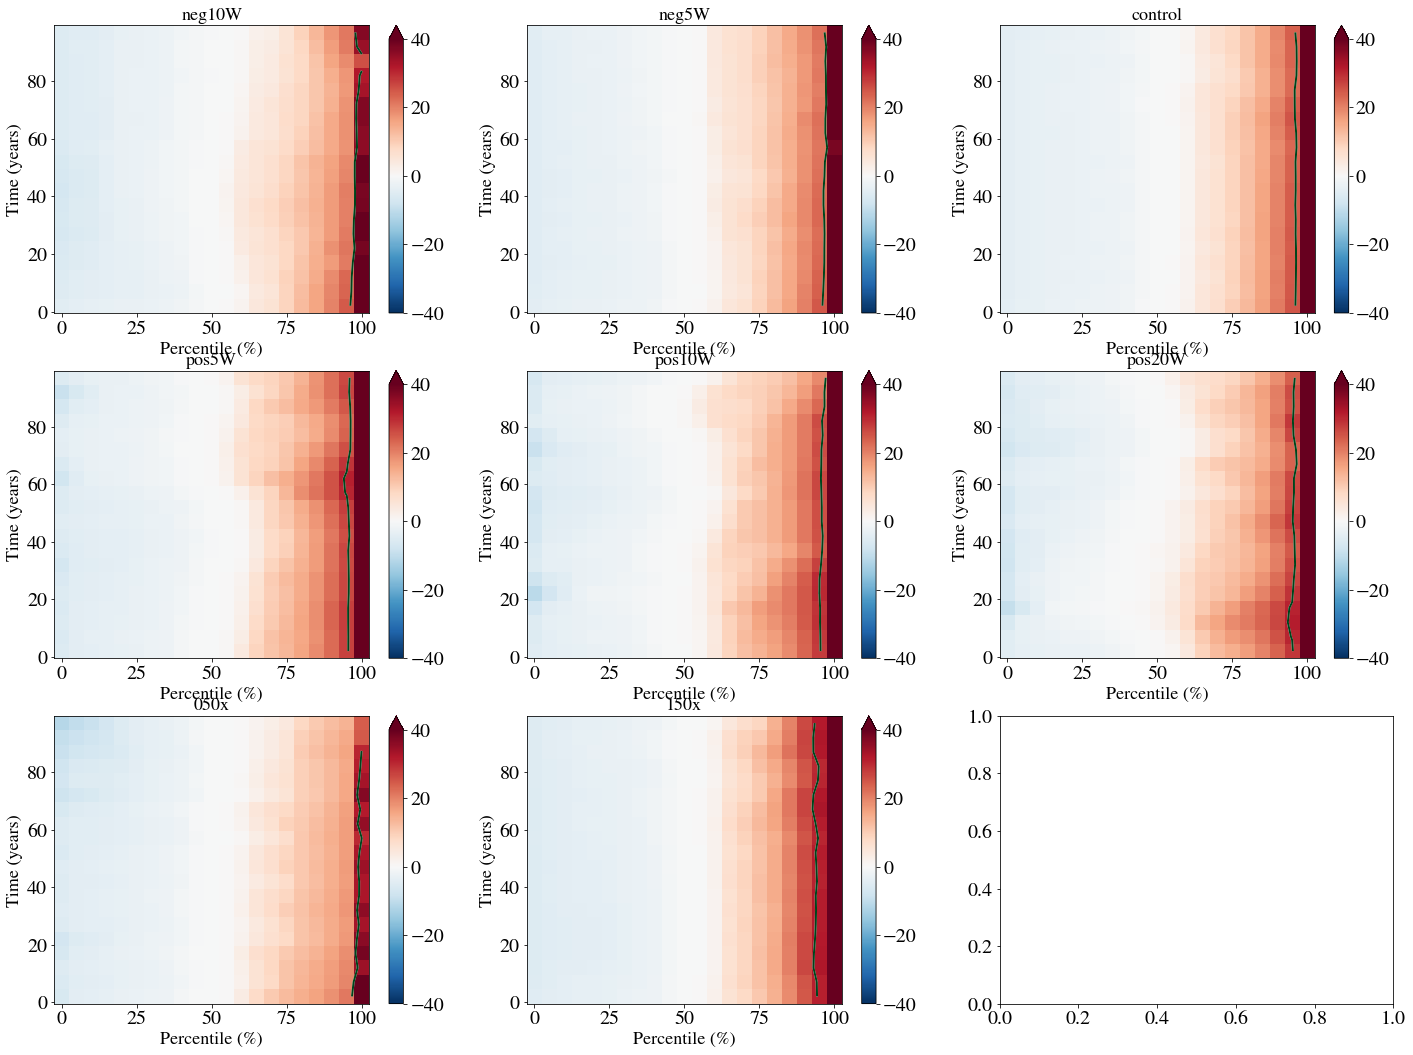

In [76]:
## Setting up a desired grid for maps and probability distributions
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (24, 18))

i = 0
for i in range(0, 8):
    data = xr.open_dataset('/g/data/x77/db6174/Varying_surface_forcing/025deg_flux_forced_uniform/netCDF/Quantiles_pdf_distribution/quantiles_' + name[i] + '.nc')
    #da = data.to_array().mean('variable').rename('psi' + name[i])
    #da.plot(ax[int(i/3)][int(i%3)])
    data.to_array().plot(ax = ax[int(i/3)][int(i%3)], vmin = -40, vmax = 40, cmap = 'RdBu_r')
    data.to_array().mean('variable').plot.contour(ax = ax[int(i/3)][int(i%3)], levels = [29.99, 30.01], cmap = 'Greens')
    ax[int(i/3)][int(i%3)].set_title(name[i], fontsize = 18)
    ax[int(i/3)][int(i%3)].set_xlabel('Percentile (%)', fontsize = 18)
    ax[int(i/3)][int(i%3)].set_ylabel('Time (years)', fontsize = 18)